2025-06-15 09:26:56.764690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749979616.791845     101 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749979616.800050     101 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


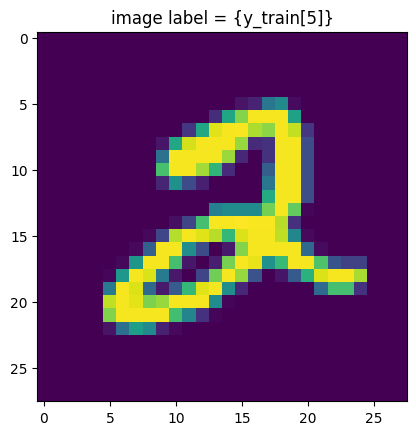

In [1]:
!pip install tensorflow

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title("image label = {y_train[5]}")
plt.show()


In [2]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [4]:
x_train = x_train/255
x_test = x_test/255
x_train.shape
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000, 10)

In [7]:

model = Sequential([  
    Flatten(input_shape=(28,28)),  # input layer neuron 784  
    Dense(5, activation='relu'),   # hidden layer 5 neuron  
    Dense(10, activation='softmax') # output layer 10 neuron  
])  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-15 09:27:01.828543: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

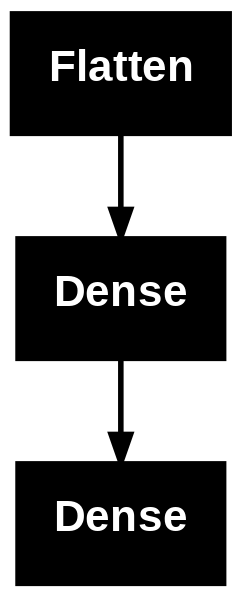

In [20]:
# Generate image for the sequential model
from keras.utils import plot_model
plot_model(model)

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.7850 - loss: 0.7118
Epoch 2/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8691 - loss: 0.4472
Epoch 3/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8809 - loss: 0.4106
Epoch 4/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8877 - loss: 0.3914
Epoch 5/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8916 - loss: 0.3781


In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.4194
Test accuracy: 0.8906


In [14]:
model.save('mnist.h5')

In [15]:
# --- For the Functional API Model ---
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

# Create a complex functional API model
input_layer = Input(shape=(28, 28))
flatten = Flatten()(input_layer)
hidden1 = Dense(128, activation='relu')(flatten)
hidden2 = Dense(256, activation='relu')(flatten)
hidden11 = Dense(64, activation='relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer = Dense(10, activation='softmax')(merge)
functional_model = Model(inputs=input_layer, outputs=output_layer)

In [16]:
functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 784)            │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │        100,480 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        200,960 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 320)            │              0 │ dense_4[0][0],         │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 10)             │          3,210 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 312,906 (1.19 MB)

 Trainable params: 312,906 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

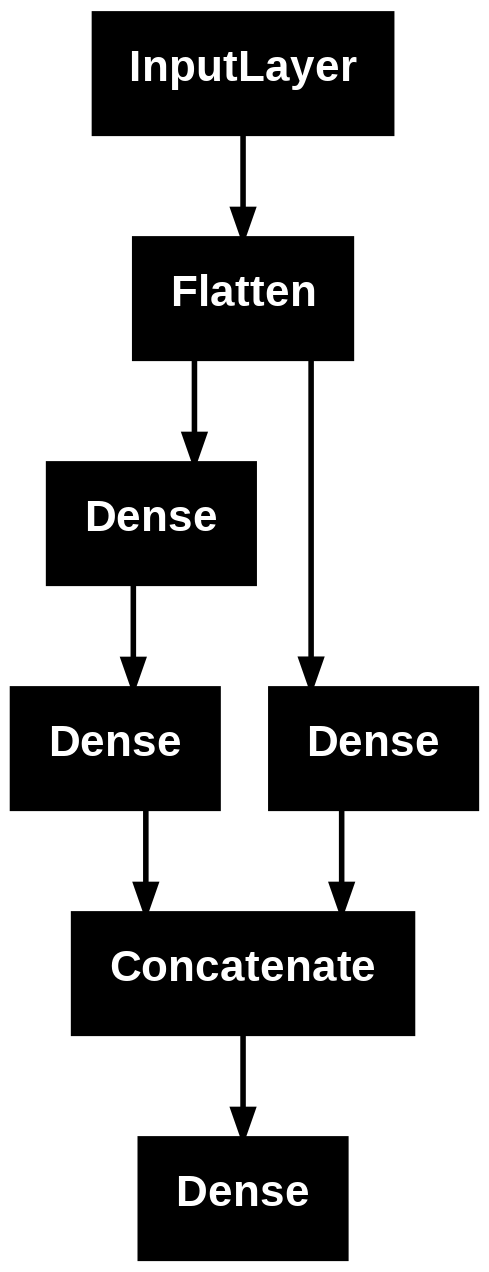

In [19]:
# Generate image for the functional model
from keras.utils import plot_model
plot_model(functional_model)

In [21]:
functional_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = functional_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    verbose=2
)

Epoch 1/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9396 - loss: 0.2059
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9751 - loss: 0.0818
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9821 - loss: 0.0552
Epoch 4/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9871 - loss: 0.0386
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9908 - loss: 0.0288


In [23]:
# Evaluate on test data
test_loss, test_acc = functional_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the model
functional_model.save('mnist_complex.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0922
Test Accuracy: 0.9766
